<a href="https://colab.research.google.com/github/luisdiaz1997/BioinformaticsExamples/blob/master/BIOE300_HM1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#genesoff, genes on, mrna
update = np.array([
                   [-1, 1, 0], #gene goes from on to off
                   [1, -1, 0], #gene goes to on to off
                   [0, 0, 1], #mrna produced
                   [0, 0, -1] #mrna degraded
])

In [3]:
def gillispie(a_reactions: np.ndarray, prng):
  #time for reaction
  a_total = np.sum(a_reactions)
  if a_total == 0:
    return 0, 0
  
  r1 = prng.rand()
  t = (1/(a_total)) * np.log(1/r1) 


  #get index of random reaction
  r2 = prng.rand()
  target = a_total * r2

  #integrate reactions
  tiled_mat = np.tile(a_reactions[:,None], len(a_reactions))
  a_cumulative = np.triu(tiled_mat).sum(axis=0)

  
  #pick first reaction higher than target
  idx = np.where(a_cumulative > target)[0][0]

  return t, idx

In [4]:
def start_simulation(rates: np.ndarray, seed=12, steps = 1000):

  prng = np.random.RandomState(seed)
  X = np.zeros((steps+1, 3))
  tt = np.zeros(steps+1)
  X[0] = np.array([0, 1, 0])

  for step in range(steps):
    a = np.zeros(4)
    a[0] = rates[0]*X[step, 0]
    a[1] = rates[1]*X[step, 1]
    a[2] = rates[2]*X[step, 1]
    a[3] = rates[3]*X[step, 2]

    t, idx = gillispie(a, prng)
    if t==0:
      print('simulation ends at step:', step)
      break
    tt[step+1] = tt[step] + t
    X[step+1] = X[step] + update[idx]

  return tt[:step+1], X[: step+1]



In [12]:
def plot(tt, X):
  plt.figure(figsize=(15, 5))
  plt.subplot(3,1,1)
  plt.plot(tt, X[:, 0], drawstyle='steps-post')
  plt.gca().set_xticks([])
  plt.ylabel('genes off')
  plt.ylim([-0.1, 1.1])

  plt.subplot(3,1,2)
  plt.plot(tt, X[:, 1], drawstyle='steps-post')
  plt.ylim([-0.1, 1.1])

  plt.gca().set_xticks([])
  plt.ylabel('genes on')

  plt.subplot(3,1,3)
  plt.plot(tt, X[:, 2])
  plt.ylabel('Number of RNAs')
  plt.xlabel('time seconds')
  

##Question 1a

simulation ends at step: 441


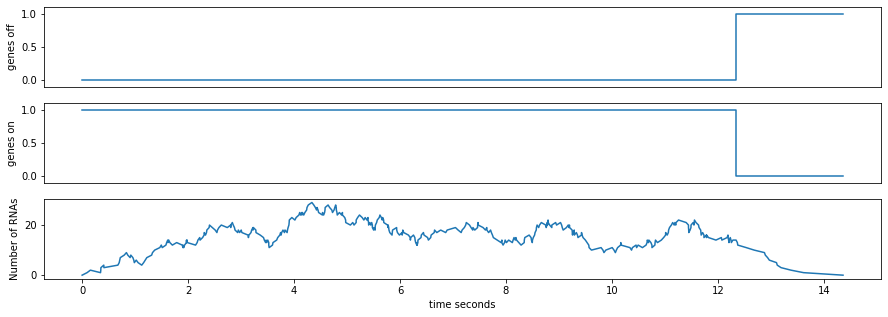

In [13]:
rates1 = np.array([0, 0.1, 20, 1])
tt, X = start_simulation(rates1)
plot(tt, X)

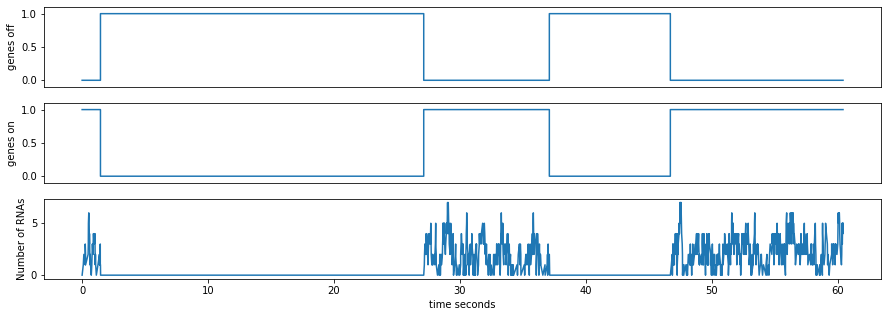

In [14]:
rates2 = np.array([0.2, 0.1, 20, 10])
tt, X = start_simulation(rates2)
plot(tt, X)

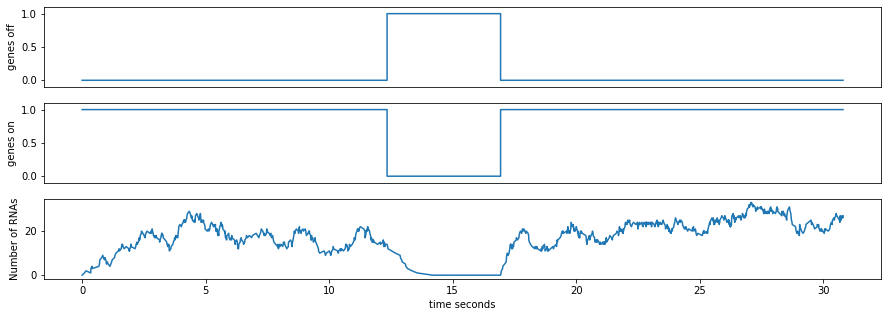

In [15]:
rates3 = np.array([0.2, 0.1, 20, 1])
tt, X = start_simulation(rates3)
plot(tt, X)

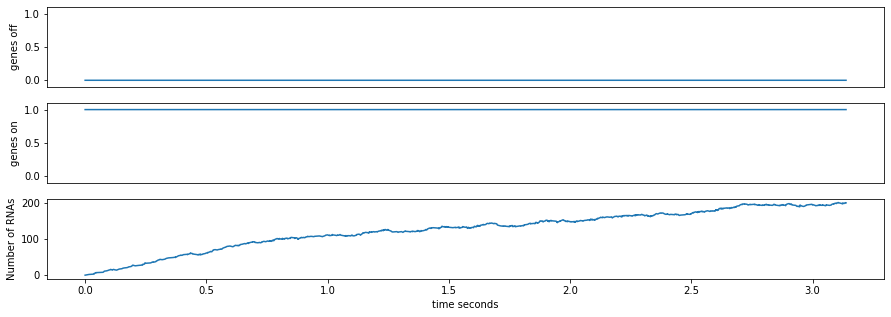

In [16]:
rates4 = np.array([0.2, 0.1, 200, 1])
tt, X = start_simulation(rates4)
plot(tt, X)

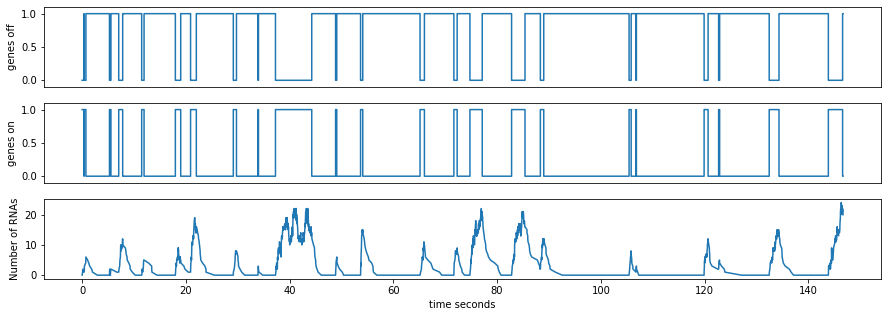

In [17]:
rates5 = np.array([0.2, 1, 20, 1])
tt, X = start_simulation(rates5)
plot(tt, X)